In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Load Customers Dataset

In [10]:
customers = pd.read_csv("raw_data\customers.csv")
customers.head()

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,118,NaN
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,118,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0
4,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,118,NaN


In [11]:
# convert the date a customer joined to a date
customers["became_member_on"] = customers["became_member_on"].astype(str)
customers["became_member_on"] = pd.to_datetime(
    customers["became_member_on"], format="%Y%m%d"
)
customers.head()

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,118,NaN
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,118,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75,100000.0
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,118,NaN


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       17000 non-null  object        
 1   became_member_on  17000 non-null  datetime64[ns]
 2   gender            14825 non-null  object        
 3   age               17000 non-null  int64         
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 664.2+ KB


In [13]:
customers.isna().sum()

customer_id            0
became_member_on       0
gender              2175
age                    0
income              2175
dtype: int64

* Age and Gender has same number of rows being null

**Numbers of Customers who joined the Cafe over the years**

In [16]:
earliest_joining_date = customers["became_member_on"].min()
print(f"First date a customer joined the Cafe: {earliest_joining_date}")

First date a customer joined the Cafe: 2013-07-29 00:00:00


In [17]:
latest_joining_date = customers["became_member_on"].max()
print(f"Last date a customer joined the Cafe: {latest_joining_date}")

Last date a customer joined the Cafe: 2018-07-26 00:00:00


In [19]:
n_customers_per_date = customers.groupby("became_member_on").agg({
    "customer_id": lambda x: x.count()
}).reset_index()

n_customers_per_date.head()

,became_member_on,customer_id
0,2013-07-29,1
1,2013-07-30,3
2,2013-07-31,1
3,2013-08-01,1
4,2013-08-02,3


Locator attempting to generate 2006 ticks ([15824.0, ..., 17829.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2006 ticks ([15824.0, ..., 17829.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2006 ticks ([15824.0, ..., 17829.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2006 ticks ([15824.0, ..., 17829.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2006 ticks ([15824.0, ..., 17829.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2006 ticks ([15824.0, ..., 17829.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2006 ticks ([15824.0, ..., 17829.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2006 ticks ([15824.0, ..., 17829.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2006 ticks ([15824.0, ..., 17829.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

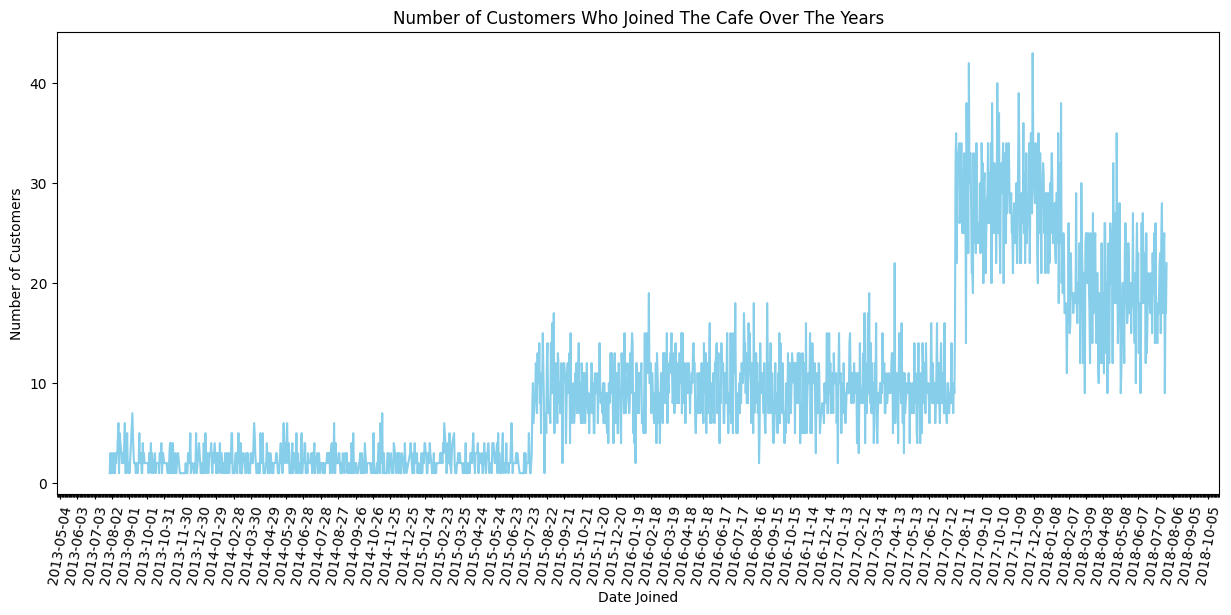

In [30]:
fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(data=n_customers_per_date, x="became_member_on", y = "customer_id", color = "skyblue")
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.xlabel("Date Joined")
plt.ylabel("Number of Customers")
plt.title("Number of Customers Who Joined The Cafe Over The Years")
plt.xticks(rotation=80)
plt.show()

* The number of customers who joined the cafe increased as the years went by however this increase took a turn in 2018 when the number of new joiners started decreasing
* Most number of customers joined between 2017 July and 2018 February

<Axes: ylabel='customer_id'>

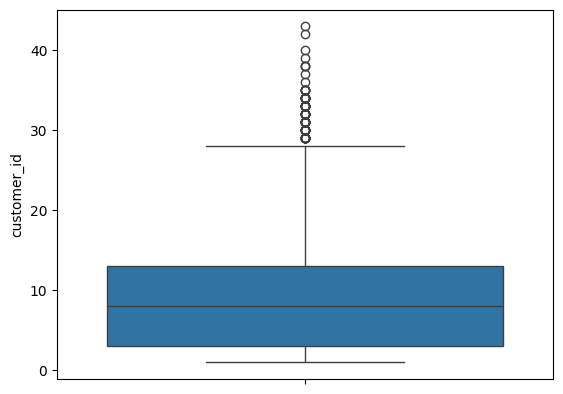

In [31]:
sns.boxplot(data = n_customers_per_date, y = "customer_id")

In [33]:
n_customers_per_date["customer_id"].describe()

count    1716.000000
mean        9.906760
std         8.728262
min         1.000000
25%         3.000000
50%         8.000000
75%        13.000000
max        43.000000
Name: customer_id, dtype: float64

* Most number of customers who joined where about 10 at a particular date
* Lowest number of customers who joined is 1 and a max is 43

**Age Distribution**

In [40]:
customers["age"].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

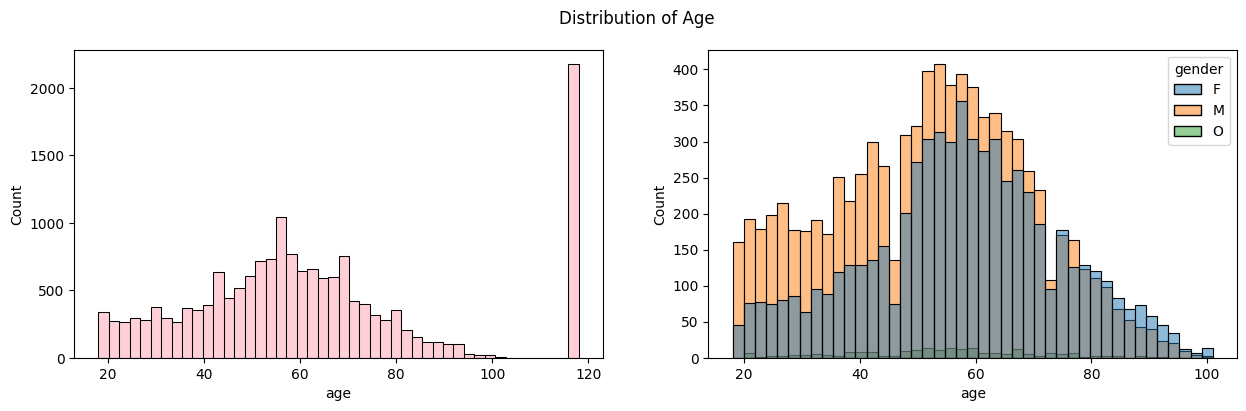

In [43]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
sns.histplot(data=customers,x="age", ax = axs[0], color = "pink")
sns.histplot(data=customers, x="age", ax=axs[1], hue = "gender")
fig.suptitle("Distribution of Age")
plt.show()

* Average Age is about 62 years old
* There are customers at max age of 118
* Most customers below 80 years old are males while those above 80 are females
* Customers classified as other are very few

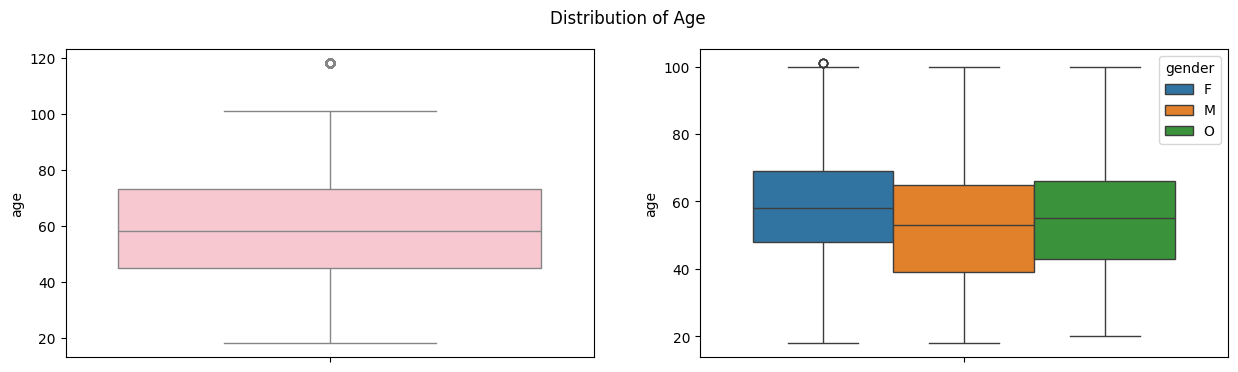

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data=customers, y="age", ax=axs[0], color="pink")
sns.boxplot(data=customers, y="age", ax=axs[1], hue="gender")
fig.suptitle("Distribution of Age")
plt.show()

* On average, Females and other customers are older compared to males

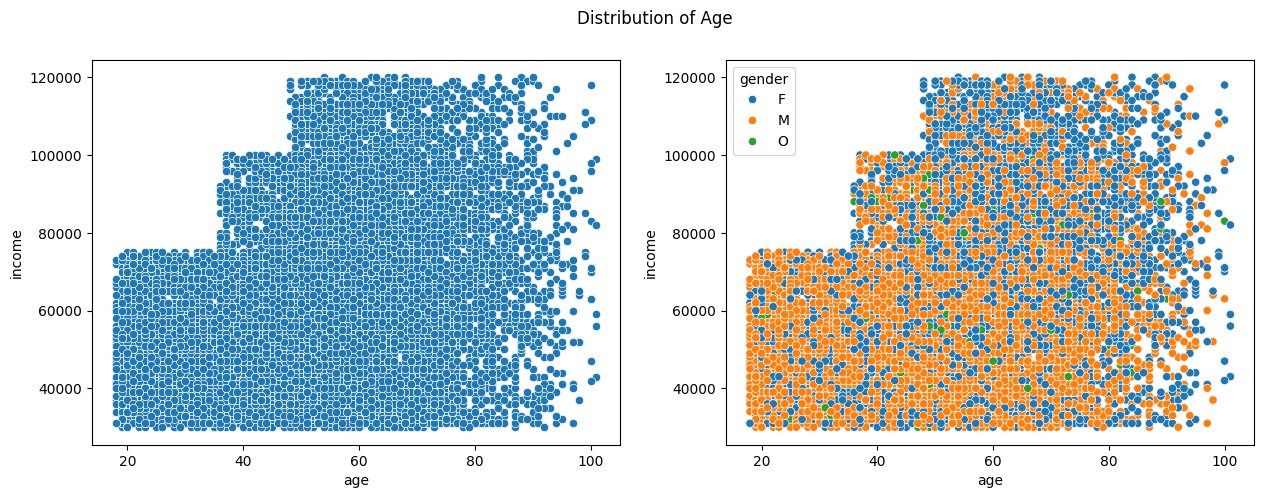

In [47]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
sns.scatterplot(data=customers, x="age", y="income", ax=axs[0])
sns.scatterplot(data=customers, x="age", y="income", ax=axs[1], hue="gender")
fig.suptitle("Distribution of Age")
plt.show()

<Axes: >

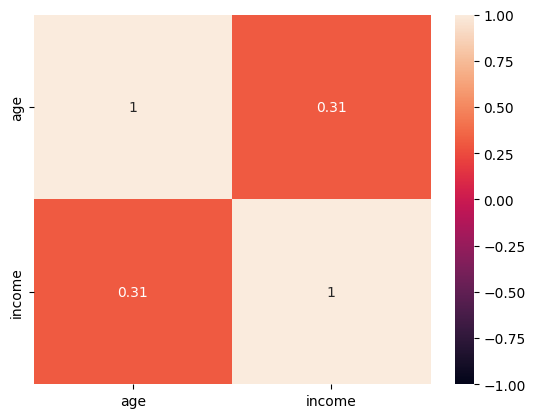

In [51]:
sns.heatmap(customers[["age", "income"]].corr(), vmin=-1, vmax=1, annot=True)

* As age increases, customer income increases
* Correlation is 0.31 between age and income

**Income Distribution**

In [55]:
customers["income"].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

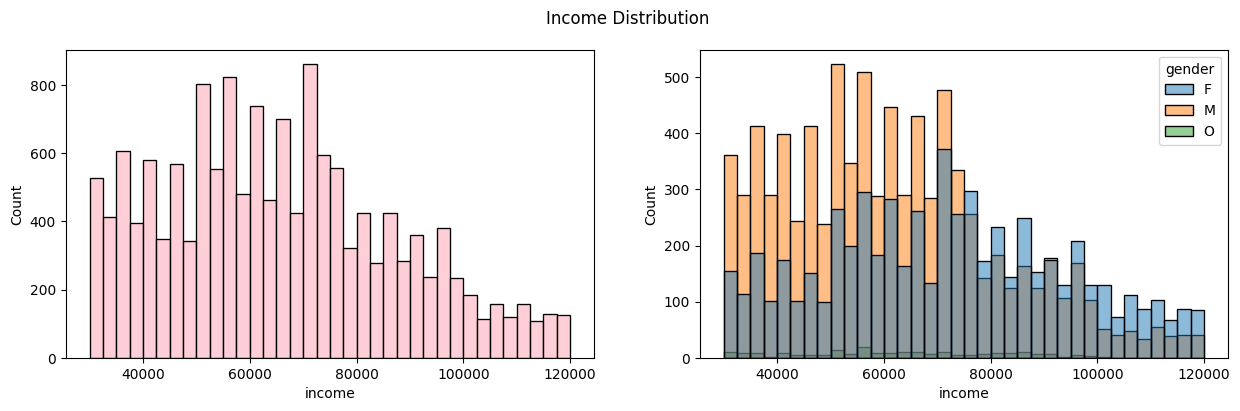

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data=customers, x="income", ax=axs[0], color="pink")
#axs[0].axvline(65404, color = "red", linestyle = "dashed")
sns.histplot(data=customers, x="income", ax=axs[1], hue="gender")
fig.suptitle("Income Distribution")
plt.show()

* Average annual income is about $65 404.99 with a minimum of $30 000 and maximum of $120 000
* Most customers have low income (right tail distribution)
* More males have higher income below average income while female have more income above the average
* Customers classified as other gender, are have income across the whole spectrum of income

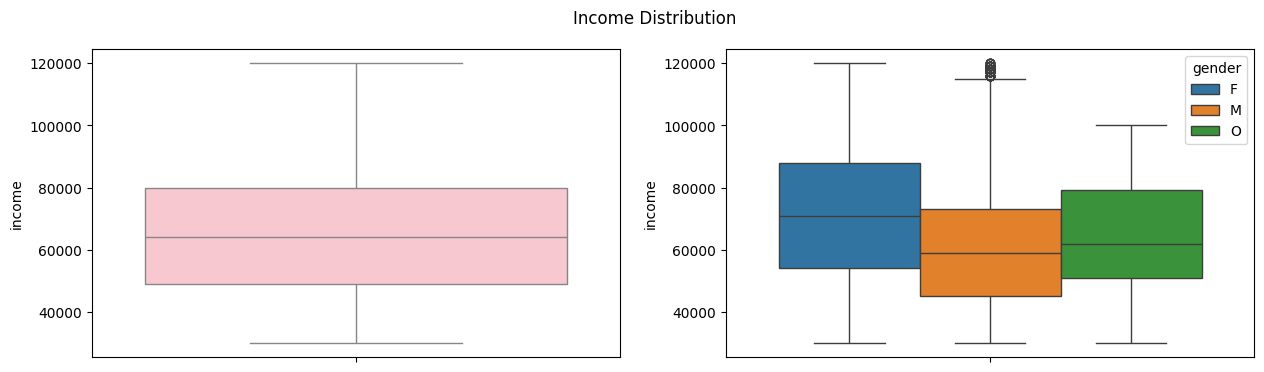

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data=customers, y="income", ax=axs[0], color="pink")
sns.boxplot(data=customers, y="income", ax=axs[1], hue="gender")
fig.suptitle("Income Distribution")
plt.show()

* On avarage, females have higher income and males have lower income

**Distribution of Gender**

In [63]:
customers["gender"].value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

In [64]:
customers["gender"].value_counts(normalize=True)

gender
M    0.572277
F    0.413423
O    0.014300
Name: proportion, dtype: float64

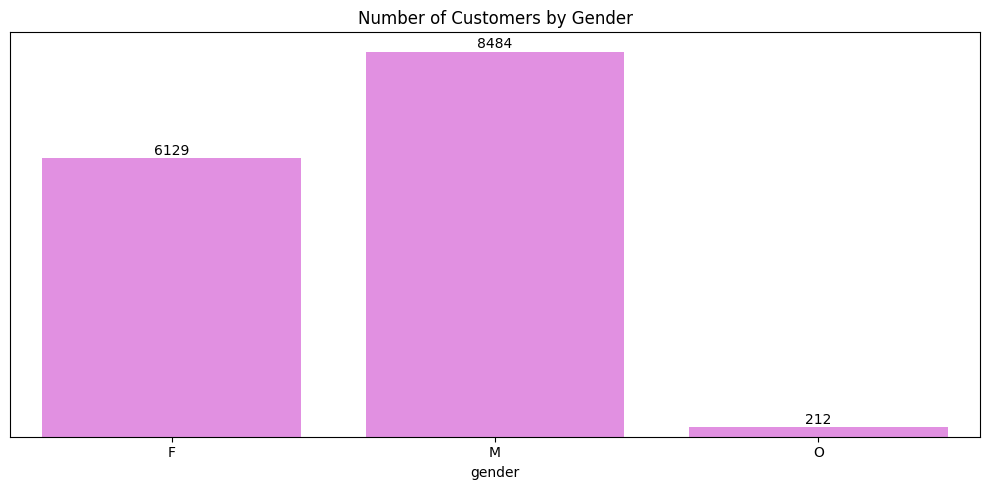

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(
    data=customers,
    x="gender",
    stat="count",
    color = "violet"
)

ax.yaxis.set_visible(False)  # Hides the y-axis line and labels
ax.set_yticks([])  # Removes the tick marks
ax.set_title("Number of Customers by Gender")
# Add value labels on the bars
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Add text label above each bar
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 10,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        # fontweight="bold",
    )

plt.tight_layout()
plt.show()

* More customers are Males (57%) and other are the fewest customers (0.014%)